In [1]:
import pandas as pd
import numpy as np

In [2]:
installs = pd.read_csv('installs.csv.gzip', compression = 'gzip', dtype ={'device_language' : 'str', 'click_hash': object, 'wifi': object, 'trans_id': object})

In [3]:
# No tiene sentido quedarse con el pais, porque es uno solo
#No tiene sentido quedarse con la columna trans_id. El 98% de los valores son Null
#No tiene sentido quedarse con click_hash, el 99% de los valors son null
#No tiene sentido quedarse con event_uuid, el 78% de los valores son null
#No tiene sentido quedarse con kind, el 78% de los valores son null
#No tiene sentido quedarse con wifi, el 48% de los valores son null
#No tiene sentido quedarse con device_brand. El 42% son null
#No tiene sentido quedarse con la columna user_agent El 31% de los valores son Null
#¿Tiene sentido quedarse con la columna session_user_agent? El 3% de los valores son Null
# session_user_agent tiene el 3% de los valores null. Borro esas filas
del installs['trans_id']
del installs['device_countrycode']
del installs['click_hash']
del installs['event_uuid']
del installs['kind']
del installs['wifi']
del installs['device_brand']
del installs['user_agent']
del installs['session_user_agent']

##Borro las filas que tienen null en device_model y device_language. Juntas son el 5% de las filas en null
installs = installs[pd.notnull(installs['device_model'])]
installs = installs[pd.notnull(installs['device_language'])]

In [4]:
installs['created'] = pd.to_datetime(installs['created'], errors = 'coerce')
installs = installs.sort_values(by = ['ref_hash', 'created'])

In [5]:
events = pd.read_csv('events.csv.gzip', compression = 'gzip',
                     dtype={
                         'device_countrycode': 'category', 
                         'device_city': 'category',
                         'ref_type': 'int64',
                         'application_id': 'int64',
                         'device_os_version': 'category',
                         'device_brand': 'category',
                         'device_model': 'float64',
                         'session_user_agent': 'category',
                         'trans_id': 'category',
                         'user_agent': 'category',
                         'carrier': 'category',
                         'device_os': 'category',
                         'device_os_version': 'category',
                         'device_language': 'category',
                         'connection_type': 'category',
                         'wifi': 'bool'
                     })

In [6]:
del events['attributed']
del events['device_countrycode'] #Borrada porque hay un solo país
del events['trans_id'] #Borrada por tener muy pocos valores (37000/7000000)
del events['event_uuid'] #Borrada por tener todos los valores distintos
del events['device_os_version'] #Borrado por tener 70% de los valores nulos.
del events['device_brand'] #Borrado por tener 67% de los valores nulos
del events['device_city'] #Borrado por tener 76% de los valores nulos
del events['user_agent'] #Borrado por tener 57% de los valores nulos
del events['carrier'] #Borrado por tener 75% de los valores nulos
del events['device_os'] #Borrado por tener 76% de los valores nulos
del events['connection_type'] #Borrado por tener 77% de los valores nulos
del events['session_user_agent']
#------------------------------------------------------------------
events = events[pd.notnull(events['kind'])] #Borrados las filas nulas (0,5%)
#------------------------------------------------------------------
events = events[pd.notnull(events['device_model'])]

In [7]:
eventos = events.groupby('ref_hash').agg({'wifi' : 'mean', 'application_id' : 'count', 'kind' : 'nunique', 'event_id' : 'count'}).reset_index()

In [8]:
events['mode_model'] = events.groupby('ref_hash')['device_model'].agg(lambda x: x.value_counts().index[0])
events['mode_lang'] = events.groupby('ref_hash')['device_language'].agg(lambda x: x.value_counts().index[0])

In [9]:
installs['total_apps'] = installs.groupby('ref_hash')['application_id'].transform('count')
installs['%implicit'] = installs.groupby('ref_hash')['implicit'].transform('mean')
installs['%attributed'] = installs.groupby('ref_hash')['attributed'].transform('mean')
installs['most_freq_lang'] = installs.groupby('ref_hash')['device_language'].transform(lambda x: x.mode().iloc[0])
installs['most_freq_app'] = installs.groupby('ref_hash')['application_id'].transform(lambda x: x.mode().iloc[0])
installs['model'] = installs.groupby('ref_hash')['device_model'].transform(lambda x: x.mode().iloc[0])
installs['ip'] = installs.groupby('ref_hash')['ip_address'].transform(lambda x: x.mode().iloc[0])

In [10]:
installs['events_%wifi'] = installs['ref_hash'].map(eventos.set_index('ref_hash')['wifi'])
installs['event_apps'] = installs['ref_hash'].map(eventos.set_index('ref_hash')['application_id'])
installs['distinct_events'] = installs['ref_hash'].map(eventos.set_index('ref_hash')['kind'])
installs['total_events'] = installs['ref_hash'].map(eventos.set_index('ref_hash')['event_id'])

In [11]:
del installs['attributed']
del installs['implicit']
del installs['application_id']
del installs['device_model']
del installs['ip_address']
del installs['device_language']

In [12]:
installs.fillna(0, inplace=True)

In [13]:
installs = installs.sort_values(by = ['ref_hash', 'created'])

In [14]:
installs['most_freq_lang'] = installs['most_freq_lang'].astype('float64')

In [15]:
w1 = installs[installs['created'].dt.day < 21]
w2 = installs[(installs['created'].dt.day > 18) & (installs['created'].dt.day < 22)]
w3 = installs[(installs['created'].dt.day > 19) & (installs['created'].dt.day < 23)]
w4 = installs[(installs['created'].dt.day > 20) & (installs['created'].dt.day < 24)]
w5 = installs[(installs['created'].dt.day > 21) & (installs['created'].dt.day < 25)]
w6 = installs[(installs['created'].dt.day > 22) & (installs['created'].dt.day < 26)]
w7 = installs[(installs['created'].dt.day > 23) & (installs['created'].dt.day < 27)]

In [16]:
windowStart = pd.to_datetime("2019-04-18 00:00:00.000000")
w1['timeFromWindowStart'] = (w1['created'] - windowStart)/np.timedelta64(1,'s')
windowStart = pd.to_datetime("2019-04-19 00:00:00.000000")
w2['timeFromWindowStart'] = (w2['created'] - windowStart)/np.timedelta64(1,'s')
windowStart = pd.to_datetime("2019-04-20 00:00:00.000000")
w3['timeFromWindowStart'] = (w3['created'] - windowStart)/np.timedelta64(1,'s')
windowStart = pd.to_datetime("2019-04-21 00:00:00.000000")
w4['timeFromWindowStart'] = (w4['created'] - windowStart)/np.timedelta64(1,'s')
windowStart = pd.to_datetime("2019-04-22 00:00:00.000000")
w5['timeFromWindowStart'] = (w5['created'] - windowStart)/np.timedelta64(1,'s')
windowStart = pd.to_datetime("2019-04-23 00:00:00.000000")
w6['timeFromWindowStart'] = (w6['created'] - windowStart)/np.timedelta64(1,'s')
windowStart = pd.to_datetime("2019-04-23 00:00:00.000000")
w7['timeFromWindowStart'] = (w7['created'] - windowStart)/np.timedelta64(1,'s')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

In [17]:
w1 = w1.sort_values(by=['ref_hash', 'created'])
w1 = w1.drop_duplicates('ref_hash', keep = 'first')
w2 = w2.sort_values(by=['ref_hash', 'created'])
w2 = w2.drop_duplicates('ref_hash', keep = 'first')
w3 = w3.sort_values(by=['ref_hash', 'created'])
w3 = w3.drop_duplicates('ref_hash', keep = 'first')
w4 = w4.sort_values(by=['ref_hash', 'created'])
w4 = w4.drop_duplicates('ref_hash', keep = 'first')
w5 = w5.sort_values(by=['ref_hash', 'created'])
w5 = w5.drop_duplicates('ref_hash', keep = 'first')
w6 = w6.sort_values(by=['ref_hash', 'created'])
w6 = w6.drop_duplicates('ref_hash', keep = 'first')
w7 = w7.sort_values(by=['ref_hash', 'created'])
w7 = w7.drop_duplicates('ref_hash', keep = 'first')

In [18]:
w1 = w1.drop(columns = ['created'])
w2 = w2.drop(columns = ['created'])
w3 = w3.drop(columns = ['created'])
w4 = w4.drop(columns = ['created'])
w5 = w5.drop(columns = ['created'])
w6 = w6.drop(columns = ['created'])
w7 = w7.drop(columns = ['created'])

In [19]:
w1.head( )

,ref_type,ref_hash,total_apps,%implicit,%attributed,most_freq_lang,most_freq_app,model,ip,events_%wifi,event_apps,distinct_events,total_events,timeFromWindowStart
398921,1891515180541284343,41863526108385,4,0.5,0.0,6.977049e+18,65,1.658417e+18,7530145772806895848,0.0,32.0,7.0,32.0,76310.326
157023,1891515180541284343,135153013040192,1,0.0,0.0,3.301378e+18,155,4.981016e+18,3962611543577681297,0.0,0.0,0.0,0.0,192980.258
424433,1891515180541284343,365882020742330,1,0.0,0.0,6.977049e+18,302,1.805456e+18,2123186418218872326,0.0,80.0,3.0,80.0,96156.508
263639,1891515180541284343,519199987760489,1,0.0,0.0,6.977049e+18,187,1.295045e+18,3058457814532425215,1.0,2.0,1.0,2.0,92860.475
389945,1891515180541284343,530786270564316,1,0.0,0.0,6.977049e+18,128,1.805456e+18,5424515648450694408,0.0,0.0,0.0,0.0,75062.237


In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [21]:
X, y = w4.iloc[:,:-1],w4.iloc[:,-1]

In [22]:
neigh = KNeighborsRegressor(n_neighbors=101)

In [23]:
neigh.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=101, p=2,
          weights='uniform')

In [24]:
preds_KNN_w7 = neigh.predict(w7.iloc[:,:-1])

In [25]:
rf = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=5, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [26]:
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [27]:
preds_RF_w7 = rf.predict(w7.iloc[:,:-1])

In [28]:
w7["pred_KNN"] = preds_KNN_w7
w7["pred_RF"] = preds_RF_w7

In [29]:
w7.head()

,ref_type,ref_hash,total_apps,%implicit,%attributed,most_freq_lang,most_freq_app,model,ip,events_%wifi,event_apps,distinct_events,total_events,timeFromWindowStart,pred_KNN,pred_RF
205516,1891515180541284343,90072729247980,1,0.0,0.0,3.301378e+18,210,6.832960e+18,7787461885673001416,0.0,3.0,1.0,3.0,153050.199,145001.091218,131808.961973
219372,1494519392962156891,342614246084071,1,0.0,0.0,3.301378e+18,167,4.566898e+18,2932356326100435311,0.0,1.0,1.0,1.0,339821.836,128611.655535,131550.796560
288979,1891515180541284343,347785260789835,1,1.0,0.0,3.301378e+18,149,1.797887e+18,281076914419225487,0.0,1.0,1.0,1.0,337211.227,135061.456455,131550.796560
142730,1891515180541284343,448610188195811,2,0.5,0.0,3.301378e+18,122,3.324371e+17,2148831140161787882,0.0,62.0,6.0,62.0,160754.142,128127.227634,127582.453374
426967,1891515180541284343,456015810461357,1,0.0,0.0,6.977049e+18,302,6.415096e+18,7993322470976974665,1.0,23.0,4.0,23.0,153597.494,143440.822683,130673.544234


In [30]:
w7.columns = ['ref_type', 'ref_hash', 'total_apps', '%implicit', '%attributed', 'most_freq_lang', 'most_freq_app', 'model', 'ip', 'events_%wifi', 'event_apps', 'distinct_events', 'total_events', 'pred_KNN', 'pred_RF', 'sc']

In [31]:
w7 = w7.drop(columns = ['pred_KNN'])
w7 = w7.drop(columns = ['pred_RF'])

In [32]:
targets_sc = pd.read_csv('target_competencia_ids.csv')
targets_sc = targets_sc[~targets_sc['ref_hash'].str.contains('_st')]
targets_sc['ref_hash'] = targets_sc['ref_hash'].map(lambda x: str(x)[:-3])

In [33]:
targets_sc['ref_hash'] = targets_sc['ref_hash'].astype(np.int64)
targets_sc.columns = ['ref_hash', 'date_dif']

In [34]:
installs_without_duplicates = installs.drop_duplicates(subset = 'ref_hash')

In [35]:
targets_sc_with_installs = targets_sc.merge(installs_without_duplicates, how = 'left', on = 'ref_hash')

In [36]:
events.drop_duplicates('ref_hash', inplace= True)

In [37]:
nulls = targets_sc_with_installs[targets_sc_with_installs['created'].isnull()]
nulls['ref_type'] = nulls['ref_hash'].map(events.set_index('ref_hash')['ref_type'])
nulls['model'] = nulls['ref_hash'].map(events.set_index('ref_hash')['device_model'])
nulls['most_freq_lang'] = nulls['ref_hash'].map(events.set_index('ref_hash')['device_language'])
nulls['most_freq_app'] = nulls['ref_hash'].map(events.set_index('ref_hash')['application_id'])
nulls['ip'] = nulls['ref_hash'].map(events.set_index('ref_hash')['ip_address'])
nulls['events_%wifi'] = nulls['ref_hash'].map(eventos.set_index('ref_hash')['wifi'])
nulls['event_apps'] = nulls['ref_hash'].map(eventos.set_index('ref_hash')['application_id'])
nulls['distinct_events'] = nulls['ref_hash'].map(eventos.set_index('ref_hash')['kind'])
nulls['total_events'] = nulls['ref_hash'].map(eventos.set_index('ref_hash')['event_id'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [38]:
targets_sc_with_installs.update(nulls)
targets_sc_with_installs.head()

,ref_hash,date_dif,created,ref_type,total_apps,%implicit,%attributed,most_freq_lang,most_freq_app,model,ip,events_%wifi,event_apps,distinct_events,total_events
0,1.000169e+18,0.0,2019-04-21 08:14:06.178,1.891515e+18,1.0,0.0,0.0,3.30138e+18,122.0,1.805456e+18,5.483720e+18,0.000000,32.0,4.0,32.0
1,1.000396e+18,0.0,2019-04-20 05:59:26.866,1.891515e+18,2.0,0.5,0.0,6.97705e+18,121.0,8.058599e+17,6.126933e+18,1.000000,2.0,2.0,2.0
2,1.003027e+18,0.0,2019-04-23 20:37:24.299,1.891515e+18,2.0,0.5,0.0,3.30138e+18,14.0,8.590181e+18,2.036110e+18,0.833333,54.0,10.0,54.0
3,1.006670e+18,0.0,2019-04-21 01:20:43.968,1.494519e+18,2.0,0.5,0.0,8.44142e+18,68.0,6.794880e+18,2.799308e+18,0.333333,3.0,2.0,3.0
4,1.007573e+18,0.0,2019-04-18 07:32:44.992,1.891515e+18,1.0,0.0,0.0,3.30138e+18,94.0,1.327864e+18,8.238829e+18,0.000000,6.0,1.0,6.0


In [39]:
targets_sc_with_installs.fillna({'total_apps' : 0, 'ref_type' : 0, '%attributed' : 0, '%implicit': 0, 'model' : 0,
                                 'most_freq_lang' : 0, 'ip' : 0, 'events_%wifi' : 0, 'event_apps' : 0, 
                                 'distinct_events' : 0, 'total_events' : 0, 'most_freq_app' : 0}, inplace = True)

In [40]:
targets_sc_with_installs.head()

,ref_hash,date_dif,created,ref_type,total_apps,%implicit,%attributed,most_freq_lang,most_freq_app,model,ip,events_%wifi,event_apps,distinct_events,total_events
0,1.000169e+18,0.0,2019-04-21 08:14:06.178,1.891515e+18,1.0,0.0,0.0,3.30138e+18,122.0,1.805456e+18,5.483720e+18,0.000000,32.0,4.0,32.0
1,1.000396e+18,0.0,2019-04-20 05:59:26.866,1.891515e+18,2.0,0.5,0.0,6.97705e+18,121.0,8.058599e+17,6.126933e+18,1.000000,2.0,2.0,2.0
2,1.003027e+18,0.0,2019-04-23 20:37:24.299,1.891515e+18,2.0,0.5,0.0,3.30138e+18,14.0,8.590181e+18,2.036110e+18,0.833333,54.0,10.0,54.0
3,1.006670e+18,0.0,2019-04-21 01:20:43.968,1.494519e+18,2.0,0.5,0.0,8.44142e+18,68.0,6.794880e+18,2.799308e+18,0.333333,3.0,2.0,3.0
4,1.007573e+18,0.0,2019-04-18 07:32:44.992,1.891515e+18,1.0,0.0,0.0,3.30138e+18,94.0,1.327864e+18,8.238829e+18,0.000000,6.0,1.0,6.0


In [41]:
del targets_sc_with_installs['date_dif']

In [42]:
targets_sc_with_installs['most_freq_lang'] = targets_sc_with_installs['most_freq_lang'].astype('float64')
targets_sc = targets_sc_with_installs[['ref_type', 'ref_hash', 'total_apps', '%implicit', '%attributed', 'most_freq_lang', 
                             'most_freq_app', 'model', 'ip', 'events_%wifi', 'event_apps', 'distinct_events', 
                             'total_events']]

In [43]:
targets_sc.head()

,ref_type,ref_hash,total_apps,%implicit,%attributed,most_freq_lang,most_freq_app,model,ip,events_%wifi,event_apps,distinct_events,total_events
0,1.891515e+18,1.000169e+18,1.0,0.0,0.0,3.301378e+18,122.0,1.805456e+18,5.483720e+18,0.000000,32.0,4.0,32.0
1,1.891515e+18,1.000396e+18,2.0,0.5,0.0,6.977049e+18,121.0,8.058599e+17,6.126933e+18,1.000000,2.0,2.0,2.0
2,1.891515e+18,1.003027e+18,2.0,0.5,0.0,3.301378e+18,14.0,8.590181e+18,2.036110e+18,0.833333,54.0,10.0,54.0
3,1.494519e+18,1.006670e+18,2.0,0.5,0.0,8.441417e+18,68.0,6.794880e+18,2.799308e+18,0.333333,3.0,2.0,3.0
4,1.891515e+18,1.007573e+18,1.0,0.0,0.0,3.301378e+18,94.0,1.327864e+18,8.238829e+18,0.000000,6.0,1.0,6.0


In [44]:
w7.head()

,ref_type,ref_hash,total_apps,%implicit,%attributed,most_freq_lang,most_freq_app,model,ip,events_%wifi,event_apps,distinct_events,total_events,sc
205516,1891515180541284343,90072729247980,1,0.0,0.0,3.301378e+18,210,6.832960e+18,7787461885673001416,0.0,3.0,1.0,3.0,131808.961973
219372,1494519392962156891,342614246084071,1,0.0,0.0,3.301378e+18,167,4.566898e+18,2932356326100435311,0.0,1.0,1.0,1.0,131550.796560
288979,1891515180541284343,347785260789835,1,1.0,0.0,3.301378e+18,149,1.797887e+18,281076914419225487,0.0,1.0,1.0,1.0,131550.796560
142730,1891515180541284343,448610188195811,2,0.5,0.0,3.301378e+18,122,3.324371e+17,2148831140161787882,0.0,62.0,6.0,62.0,127582.453374
426967,1891515180541284343,456015810461357,1,0.0,0.0,6.977049e+18,302,6.415096e+18,7993322470976974665,1.0,23.0,4.0,23.0,130673.544234


In [45]:
X, y = w7.iloc[:,:-1],w7.iloc[:,-1]

In [46]:
neigh = KNeighborsRegressor(n_neighbors=101)

In [47]:
neigh.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=101, p=2,
          weights='uniform')

In [48]:
preds_KNN_targets = neigh.predict(targets_sc)

In [49]:
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [50]:
preds_RF_targets = rf.predict(targets_sc)

In [51]:
w7["pred_KNN"] = preds_KNN_w7
w7["pred_RF"] = preds_RF_w7
targets_sc["pred_KNN"] = preds_KNN_targets
targets_sc["pred_RF"] = preds_RF_targets

In [52]:
w7.head()

,ref_type,ref_hash,total_apps,%implicit,%attributed,most_freq_lang,most_freq_app,model,ip,events_%wifi,event_apps,distinct_events,total_events,sc,pred_KNN,pred_RF
205516,1891515180541284343,90072729247980,1,0.0,0.0,3.301378e+18,210,6.832960e+18,7787461885673001416,0.0,3.0,1.0,3.0,131808.961973,145001.091218,131808.961973
219372,1494519392962156891,342614246084071,1,0.0,0.0,3.301378e+18,167,4.566898e+18,2932356326100435311,0.0,1.0,1.0,1.0,131550.796560,128611.655535,131550.796560
288979,1891515180541284343,347785260789835,1,1.0,0.0,3.301378e+18,149,1.797887e+18,281076914419225487,0.0,1.0,1.0,1.0,131550.796560,135061.456455,131550.796560
142730,1891515180541284343,448610188195811,2,0.5,0.0,3.301378e+18,122,3.324371e+17,2148831140161787882,0.0,62.0,6.0,62.0,127582.453374,128127.227634,127582.453374
426967,1891515180541284343,456015810461357,1,0.0,0.0,6.977049e+18,302,6.415096e+18,7993322470976974665,1.0,23.0,4.0,23.0,130673.544234,143440.822683,130673.544234


In [53]:
w7.columns = ['ref_type', 'ref_hash', 'total_apps', '%implicit', '%attributed', 'most_freq_lang', 'most_freq_app', 'model', 'ip', 'events_%wifi', 'event_apps', 'distinct_events', 'total_events', 'pred_KNN', 'pred_RF', 'sc']

In [54]:
X, y = w7.iloc[:,:-1],w7.iloc[:,-1]

In [55]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [56]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                colsample_bytree = 0.9, learning_rate = 0.80,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [57]:
xg_reg.fit(X,y)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0, learning_rate=0.8, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [58]:
preds = xg_reg.predict(targets_sc)

In [59]:
import matplotlib.pyplot as plt

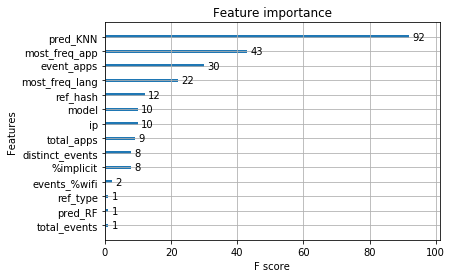

In [60]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [15, 15]
plt.show()

In [61]:
for pred in preds: print(pred)

130045.555
130911.66
129793.914
130920.46
129956.37
131127.86
129373.29
130515.29
131011.58
131074.11
130717.54
129614.02
131981.11
130921.25
131107.88
131671.52
130229.555
129373.29
130538.8
131074.11
132060.14
131052.016
131074.11
130795.07
130891.37
129589.53
126962.6
130866.72
131919.34
130703.16
130866.72
131074.11
131037.62
132060.14
129418.23
129801.89
129667.766
131043.664
131897.66
126962.6
128724.305
131756.86
132376.66
132060.14
130538.8
131074.11
129667.766
130866.72
131509.17
131037.62
129261.03
129233.04
130284.875
130408.664
130299.81
132060.14
133479.11
131360.03
129911.43
131037.62
131531.17
130855.22
129731.734
130726.34
131919.34
129554.94
130417.33
132120.53
130761.12
130891.37
129911.43
132755.67
133483.77
129748.15
129233.04
129325.26
127545.1
131107.88
130866.72
132130.4
131074.11
129443.55
131404.38
132365.19
131074.11
131011.58
135276.92
131011.58
132060.14
132638.53
131082.55
126962.6
126962.6
131074.11
131074.11
131074.11
131107.88
131043.664
130891.37
131074